In [1]:
!pip install yfinance

  Created wheel for yfinance: filename=yfinance-0.1.54-py2.py3-none-any.whl size=22409 sha256=ab073359fe62b01f81599b68ef6d50dbdecc7b06534bb866bbff39cfe3798053
  Stored in directory: /root/.cache/pip/wheels/f9/e3/5b/ec24dd2984b12d61e0abf26289746c2436a0e7844f26f2515c
Successfully built yfinance


In [21]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn 
import sqlite3
import yfinance
import keras

Using TensorFlow backend.


In [3]:
ARKW = pd.read_csv("https://query1.finance.yahoo.com/v7/finance/download/ARKW?period1=1564515848&period2=1596138248&interval=1d&events=history")

ARKW

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-07-30,53.279999,53.798000,53.000000,53.660000,53.660000,61100
1,2019-07-31,53.000000,53.189999,51.630001,52.480000,52.480000,77800
2,2019-08-01,52.340000,53.344002,51.445000,51.990002,51.990002,49400
3,2019-08-02,51.250000,51.313999,50.180000,50.680000,50.680000,75200
4,2019-08-05,49.189999,49.189999,48.060001,48.520000,48.520000,142000
...,...,...,...,...,...,...,...
249,2020-07-24,93.389999,94.989998,91.760002,93.900002,93.900002,757900
250,2020-07-27,95.150002,96.849998,94.162003,96.750000,96.750000,424900
251,2020-07-28,96.330002,97.040001,95.050003,95.129997,95.129997,356100
252,2020-07-29,96.089996,97.709999,95.919998,97.180000,97.180000,351300


In [4]:
ARKW.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-07-30,53.279999,53.798000,53.000000,53.660000,53.660000,61100
1,2019-07-31,53.000000,53.189999,51.630001,52.480000,52.480000,77800
2,2019-08-01,52.340000,53.344002,51.445000,51.990002,51.990002,49400
3,2019-08-02,51.250000,51.313999,50.180000,50.680000,50.680000,75200
4,2019-08-05,49.189999,49.189999,48.060001,48.520000,48.520000,142000


In [5]:
ARKW.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
249,2020-07-24,93.389999,94.989998,91.760002,93.900002,93.900002,757900
250,2020-07-27,95.150002,96.849998,94.162003,96.750000,96.750000,424900
251,2020-07-28,96.330002,97.040001,95.050003,95.129997,95.129997,356100
252,2020-07-29,96.089996,97.709999,95.919998,97.180000,97.180000,351300
253,2020-07-30,96.269997,98.180000,95.685997,97.959999,97.959999,359947


In [6]:
ARKW.describe()

,Open,High,Low,Close,Adj Close,Volume
count,254.000000,254.000000,254.000000,254.000000,254.000000,2.540000e+02
mean,62.120748,62.901528,61.301654,62.201677,62.201677,2.547923e+05
std,13.868712,14.057191,13.598547,13.887564,13.887564,2.657960e+05
min,42.930000,45.062000,40.494999,42.709999,42.709999,1.870000e+04
25%,50.955001,51.346000,50.247500,51.069751,51.069751,6.117500e+04
50%,58.010001,58.592500,57.114999,57.655000,57.655000,1.886000e+05
75%,68.950001,70.275000,68.122252,69.797503,69.797503,3.516000e+05
max,100.099998,100.910004,97.760002,98.940002,98.940002,1.935300e+06


In [8]:
conn = sqlite3.connect("ARKWT.db")
c = conn.cursor()

In [8]:
conn = sqlite3.connect("ARKWT.db")
c = conn.cursor()

In [10]:
ARKW.to_sql("ARKW", conn, if_exists='replace')

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:2663: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  method=method,


In [11]:
#See data
c.execute("""SELECT * FROM ARKW""")
rows = c.fetchall()
rows

[(0, '2019-07-30', 53.279999, 53.798, 53.0, 53.66, 53.66, 61100),
 (1, '2019-07-31', 53.0, 53.189999, 51.630001, 52.48, 52.48, 77800),
 (2,
  '2019-08-01',
  52.34,
  53.344002,
  51.445,
  51.990002000000004,
  51.990002000000004,
  49400),
 (3, '2019-08-02', 51.25, 51.313999, 50.18, 50.68, 50.68, 75200),
 (4, '2019-08-05', 49.189999, 49.189999, 48.060001, 48.52, 48.52, 142000),
 (5,
  '2019-08-06',
  49.18,
  49.610001000000004,
  48.400002,
  48.919998,
  48.919998,
  75400),
 (6,
  '2019-08-07',
  48.389998999999996,
  49.68,
  48.389998999999996,
  49.68,
  49.68,
  39200),
 (7, '2019-08-08', 50.0, 50.847, 49.68, 50.847, 50.847, 42800),
 (8, '2019-08-09', 50.560001, 50.82, 49.924999, 50.119999, 50.119999, 35700),
 (9,
  '2019-08-12',
  49.630001,
  49.630001,
  48.917999,
  49.029999,
  49.029999,
  46600),
 (10,
  '2019-08-13',
  49.029999,
  50.18,
  48.880001,
  49.959998999999996,
  49.959998999999996,
  63000),
 (11,
  '2019-08-14',
  48.849998,
  48.849998,
  47.59,
  47.889

In [20]:
#ARKW.to_excel("ARKWT.xls")

pd.read_excel("ARKWT.xls")

,Unnamed: 0,Date,Open,High,Low,Close,Adj Close,Volume
0,0,2019-07-30,53.279999,53.798000,53.000000,53.660000,53.660000,61100
1,1,2019-07-31,53.000000,53.189999,51.630001,52.480000,52.480000,77800
2,2,2019-08-01,52.340000,53.344002,51.445000,51.990002,51.990002,49400
3,3,2019-08-02,51.250000,51.313999,50.180000,50.680000,50.680000,75200
4,4,2019-08-05,49.189999,49.189999,48.060001,48.520000,48.520000,142000
...,...,...,...,...,...,...,...,...
249,249,2020-07-24,93.389999,94.989998,91.760002,93.900002,93.900002,757900
250,250,2020-07-27,95.150002,96.849998,94.162003,96.750000,96.750000,424900
251,251,2020-07-28,96.330002,97.040001,95.050003,95.129997,95.129997,356100
252,252,2020-07-29,96.089996,97.709999,95.919998,97.180000,97.180000,351300


findfont: Font family ['Comic Sans MS'] not found. Falling back to DejaVu Sans.


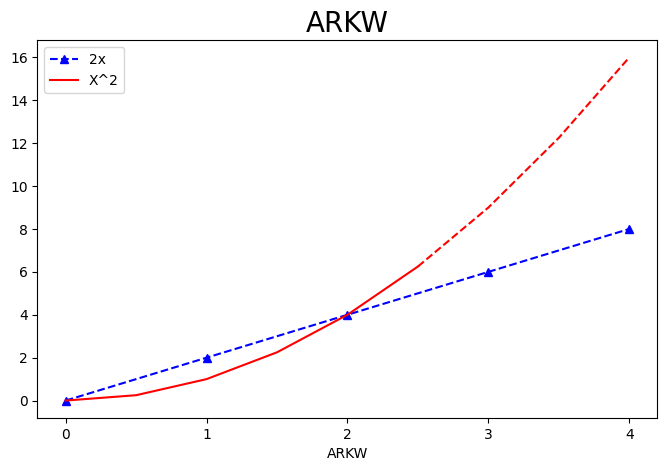

In [22]:
x = [0,1,2,3,4]
y = [0,2,4,6,8]

# Resize your Graph (dpi specifies pixels per inch. When saving probably should use 300 if possible)
plt.figure(figsize=(8,5), dpi=100)

# Line 1

# Keyword Argument Notation
#plt.plot(x,y, label='2x', color='red', linewidth=2, marker='.', linestyle='--', markersize=10, markeredgecolor='blue')

# Shorthand notation
# fmt = '[color][marker][line]'
plt.plot(x,y, 'b^--', label='2x')

## Line 2

# select interval we want to plot points at
x2 = np.arange(0,4.5,0.5)

# Plot part of the graph as line
plt.plot(x2[:6], x2[:6]**2, 'r', label='X^2')

# Plot remainder of graph as a dot
plt.plot(x2[5:], x2[5:]**2, 'r--')

# Add a title (specify font parameters with fontdict)
plt.title('ARKW', fontdict={'fontname': 'Comic Sans MS', 'fontsize': 20})

# X and Y labels
plt.xlabel('ARKW')

# X, Y axis Tickmarks (scale of your graph)
plt.xticks([0,1,2,3,4,])
#plt.yticks([0,2,4,6,8,10])

# Add alegend
plt.legend()

# Save figure (dpi 300 is good when saving so graph has high resolution)
plt.savefig('mygraph.png', dpi=300)

# Show plot
plt.show()

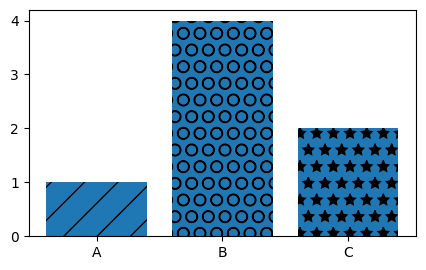

In [23]:
labels = ['A', 'B', 'C']
values = [1,4,2]

plt.figure(figsize=(5,3), dpi=100)

bars = plt.bar(labels, values)

patterns = ['/', 'O', '*']
for bar in bars:
    bar.set_hatch(patterns.pop(0))

plt.savefig('barchart.png', dpi=300)

plt.show()

<function matplotlib.pyplot.show>

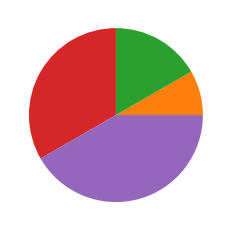

In [24]:
plt.pie([0,1,2,4,5]) 
plt.show

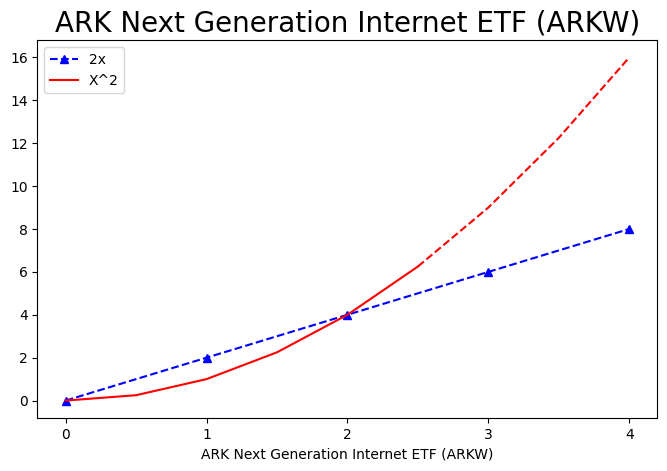

In [25]:
x = [0,1,2,3,4]
y = [0,2,4,6,8]

# Resize your Graph (dpi specifies pixels per inch. When saving probably should use 300 if possible)
plt.figure(figsize=(8,5), dpi=100)

# Line 1

# Keyword Argument Notation
#plt.plot(x,y, label='2x', color='red', linewidth=2, marker='.', linestyle='--', markersize=10, markeredgecolor='blue')

# Shorthand notation
# fmt = '[color][marker][line]'
plt.plot(x,y, 'b^--', label='2x')

## Line 2

# select interval we want to plot points at
x2 = np.arange(0,4.5,0.5)

# Plot part of the graph as line
plt.plot(x2[:6], x2[:6]**2, 'r', label='X^2')

# Plot remainder of graph as a dot
plt.plot(x2[5:], x2[5:]**2, 'r--')

# Add a title (specify font parameters with fontdict)
plt.title('ARK Next Generation Internet ETF (ARKW)', fontdict={'fontname': 'Comic Sans MS', 'fontsize': 20})

# X and Y labels
plt.xlabel('ARK Next Generation Internet ETF (ARKW)')

# X, Y axis Tickmarks (scale of your graph)
plt.xticks([0,1,2,3,4,])
#plt.yticks([0,2,4,6,8,10])

# Add a legend
plt.legend()

# Save figure (dpi 300 is good when saving so graph has high resolution)
plt.savefig('mygraph.png', dpi=300)

# Show plot
plt.show()